In [63]:
 !pip install wget
 !pip install opencv-python

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


In [ ]:
train_dir='inaturalist_12K/train/' 
test_dir='inaturalist_12K/val/'
savePath=cwd+'/DataSet/'
classes=['Amphibia','Animalia','Arachnida','Aves','Fungi','Insecta','Mammalia','Mollusca','Plantae','Reptilia']

### Download and Extract 

In [65]:
import os
from os.path import exists
import sys
import requests
import zipfile
import wget
cwd = os.getcwd()

file_exists = exists(cwd+'/DataSet/nature_12K.zip')
def bar_progress(current, total, width=80):
  progress_message = "Downloading: %d%% [%d / %d] bytes" % (current / total * 100, current, total)
  # Don't use print() as it will print in new line every time.
  sys.stdout.write("\r" + progress_message)
  sys.stdout.flush()
if(file_exists==False):
    url='https://storage.googleapis.com/wandb_datasets/nature_12K.zip'
    print('Downloading..')
    wget.download(url,savePath)
    
extract_exists = exists(cwd+'/DataSet/inaturalist_12K')   
if(extract_exists==False):   
    savePath=cwd+'\\DataSet'
    savefile=cwd+'\\DataSet\\nature_12K.zip'
    print('Extracting..')
    with zipfile.ZipFile(savefile, 'r') as zip_ref:
        zip_ref.extractall(savePath)
    print('Finished..')
   
    

In [66]:
train_dir='inaturalist_12K/train/'
test_dir='inaturalist_12K/val/'
classes=['Amphibia','Animalia','Arachnida','Aves','Fungi','Insecta','Mammalia','Mollusca','Plantae','Reptilia']

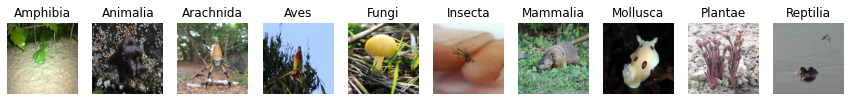

In [117]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random 
import cv2
imagePath=os.getcwd()+'\\DataSet\\inaturalist_12K\\train'
listImages=[]
columns = 5
rows = 5
imcount=1

for i in classes:
    p=imagePath+'\\'+i
    files=os.listdir( p)
    img=random.choice(files)
    imgplt=mpimg.imread( p+'\\'+str(img))
    imgplt=cv2.resize(imgplt,(250,250)) 
    listImages.append(imgplt)
    #plt.imshow(imgplt)
    #fig.add_subplot(rows, columns, imcount)
    #imcount+=1
    #plt.axis('off')
    #plt.title(i) 

_, axs = plt.subplots(1, 10, figsize=(15, 15))
axs = axs.flatten()
for img, ax,cls in zip(listImages, axs,classes):
  
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(str(cls))
plt.show()